In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import ensemble
from sklearn import metrics
sns.mpl.style.use('ggplot')

In [2]:
np.random.seed(20180604)

In [3]:
fair_df = sm.datasets.fair.load_pandas().data

In [4]:
fair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
fair_df.loc[:, :'occupation_husb'].head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [6]:
(fair_df.affairs > 0).head()

0    True
1    True
2    True
3    True
4    True
Name: affairs, dtype: bool

In [7]:
X = fair_df.loc[:, :'occupation_husb']
y = fair_df.affairs > 0

In [8]:
m = ensemble.RandomForestClassifier()
m.fit(X, y)
# It will cause overfitting. Split your dataset when train a serious model!
# See http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation .

/Users/mosky/.local/share/virtualenvs/practicing-python-3-WB-t2u1E/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
y_hat = m.predict(X)

In [10]:
y_hat

array([ True,  True,  True, ..., False, False, False])

In [11]:
print(metrics.classification_report(y, y_hat))
# precision = correct / all predicted positive
# recall = correct / all actual positive
# f1-score = the harmonic mean of precision and recall

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      4313
        True       0.91      0.84      0.87      2053

   micro avg       0.92      0.92      0.92      6366
   macro avg       0.92      0.90      0.91      6366
weighted avg       0.92      0.92      0.92      6366



In [12]:
c = metrics.confusion_matrix(y, y_hat)

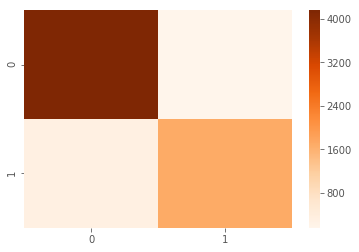

In [13]:
sns.heatmap(c, cmap='Oranges')
# row is actual
# col is predicted

In [14]:
# c
# 4151+162
# 4151/(4151+162)
# 162p/(4151+162)
# c.sum(axis=1)
# c.sum(axis=1, keepdims=True)
# c/c.sum(axis=1, keepdims=True)

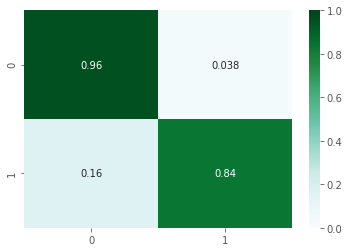

In [15]:
sns.heatmap(c/c.sum(axis=1, keepdims=True), vmin=0, vmax=1, annot=True, cmap='BuGn')
# c[actual, predicted]
# c[0, 1] = false positive rate = type I error rate
# c[0, 0] = true negative rate = specificity (特異度)
# c[1, 0] = false negative rate = type II error rate
# c[1, 1] = true positive rate = sensitivity (靈敏度)

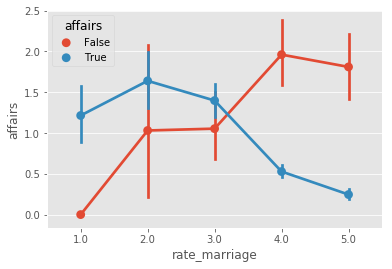

In [16]:
sns.pointplot(x=fair_df['rate_marriage'], y=fair_df['affairs'], hue=(y == y_hat))